In [4]:
import os
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from decouple import config
import pandas as pd

import config as cfg

In [6]:
user = config('DB_USER')
password = config('DB_PASSWORD')
host = config('DB_HOST')
port = config('DB_PORT')
name = config('DB_NAME')

df = pd.read_sql(
        '''SELECT
            d.*,
            c.stationid,
            c.mintemperature,
            c.maxtemperature,
            c.avgtemperature,
            c.avghumidity,
            c.rainfall,
            c.sunshinedirection,
            c.maxwindspeed,
            c.avgwindspeed,
            c.winddirection,
            c.mostwinddirection,
            s.latitude,
            s.longitude
        FROM
            weather_schema.climate c
            LEFT JOIN weather_schema.dates d ON c.dateid = d.dateid\
            LEFT JOIN weather_schema.station s ON s.stationid = c.stationid
        ''',
        create_engine(
            f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{name}'
        )
    )
df.head()

,dateid,fulldate,year,quarter,month,day,stationid,mintemperature,maxtemperature,avgtemperature,avghumidity,rainfall,sunshinedirection,maxwindspeed,avgwindspeed,winddirection,mostwinddirection,latitude,longitude
0,20100101,2010-01-01,2010,1,1,1,96001,21.4,30.2,27.1,82.0,9.0,0.5,7.0,5.0,90.0,E,5.87655,95.33785
1,20100102,2010-01-02,2010,1,1,2,96001,21.0,29.6,25.7,95.0,24.0,0.2,6.0,4.0,90.0,E,5.87655,95.33785
2,20100103,2010-01-03,2010,1,1,3,96001,20.2,26.8,24.5,98.0,63.0,0.0,5.0,4.0,90.0,E,5.87655,95.33785
3,20100104,2010-01-04,2010,1,1,4,96001,21.0,29.2,25.8,90.0,0.0,0.1,4.0,3.0,225.0,SW,5.87655,95.33785
4,20100105,2010-01-05,2010,1,1,5,96001,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,,5.87655,95.33785


In [7]:
import folium

In [17]:
indo_map = folium.Map(location=[5.87655, 95.33785], height=1050, width=2048, tiles="OpenStreetMap", zoom_start=14)

for statid in df['stationid'].unique():
    temp_df = df[df['stationid']==statid][['latitude', 'longitude']]
    folium.Marker([temp_df['latitude'].iloc[0], temp_df['longitude'].iloc[0]]).add_to(indo_map)

indo_map


# Visualizing Boundaries

In [18]:
df.head()

,dateid,fulldate,year,quarter,month,day,stationid,mintemperature,maxtemperature,avgtemperature,avghumidity,rainfall,sunshinedirection,maxwindspeed,avgwindspeed,winddirection,mostwinddirection,latitude,longitude
0,20100101,2010-01-01,2010,1,1,1,96001,21.4,30.2,27.1,82.0,9.0,0.5,7.0,5.0,90.0,E,5.87655,95.33785
1,20100102,2010-01-02,2010,1,1,2,96001,21.0,29.6,25.7,95.0,24.0,0.2,6.0,4.0,90.0,E,5.87655,95.33785
2,20100103,2010-01-03,2010,1,1,3,96001,20.2,26.8,24.5,98.0,63.0,0.0,5.0,4.0,90.0,E,5.87655,95.33785
3,20100104,2010-01-04,2010,1,1,4,96001,21.0,29.2,25.8,90.0,0.0,0.1,4.0,3.0,225.0,SW,5.87655,95.33785
4,20100105,2010-01-05,2010,1,1,5,96001,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,,5.87655,95.33785


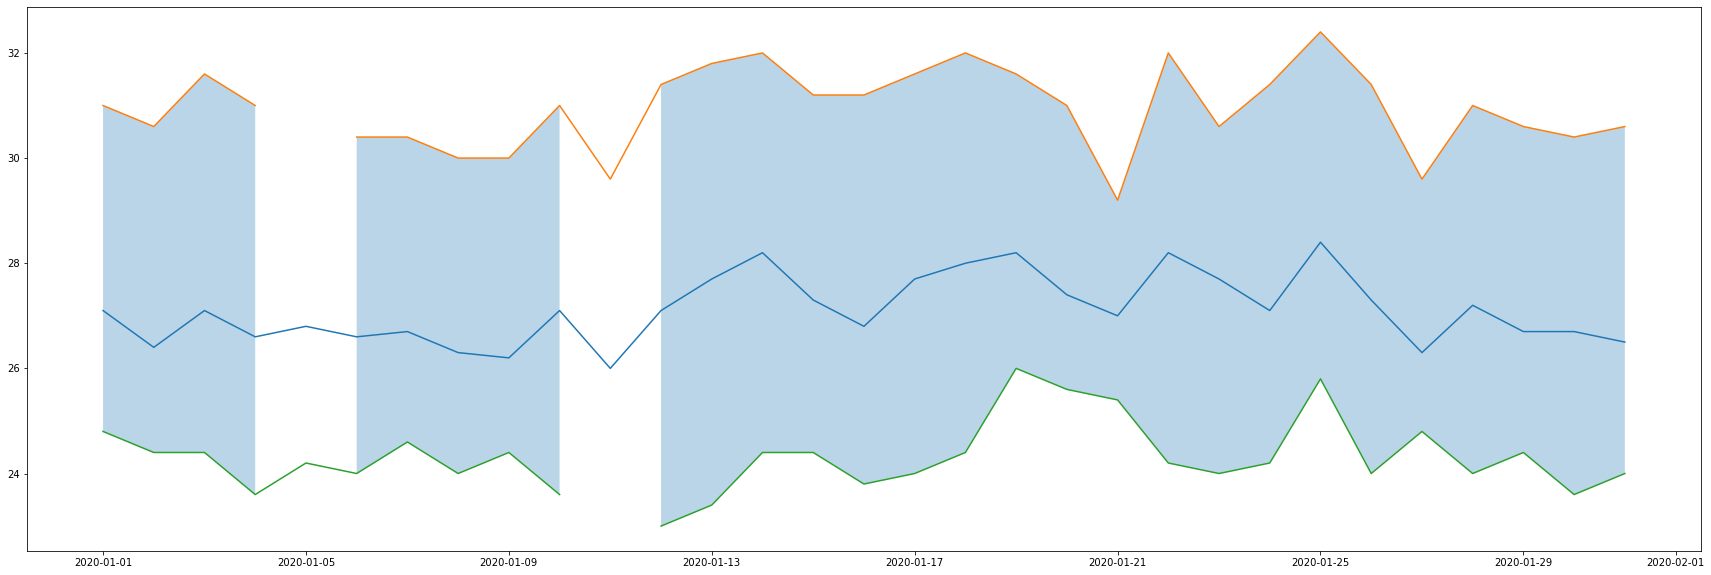

In [39]:
plt.figure(figsize=(30,10))

temp_df = df.copy()
temp_df = temp_df[(temp_df['stationid'] == 96001) & (temp_df['year'] == 2020) & (temp_df['month'] < 2)]

plt.plot(temp_df['fulldate'], temp_df['avgtemperature'])
plt.plot(temp_df['fulldate'], temp_df['maxtemperature'])
plt.plot(temp_df['fulldate'], temp_df['mintemperature'])

plt.fill_between(temp_df['fulldate'], temp_df['mintemperature'], temp_df['maxtemperature'], alpha=0.3)

plt.show()

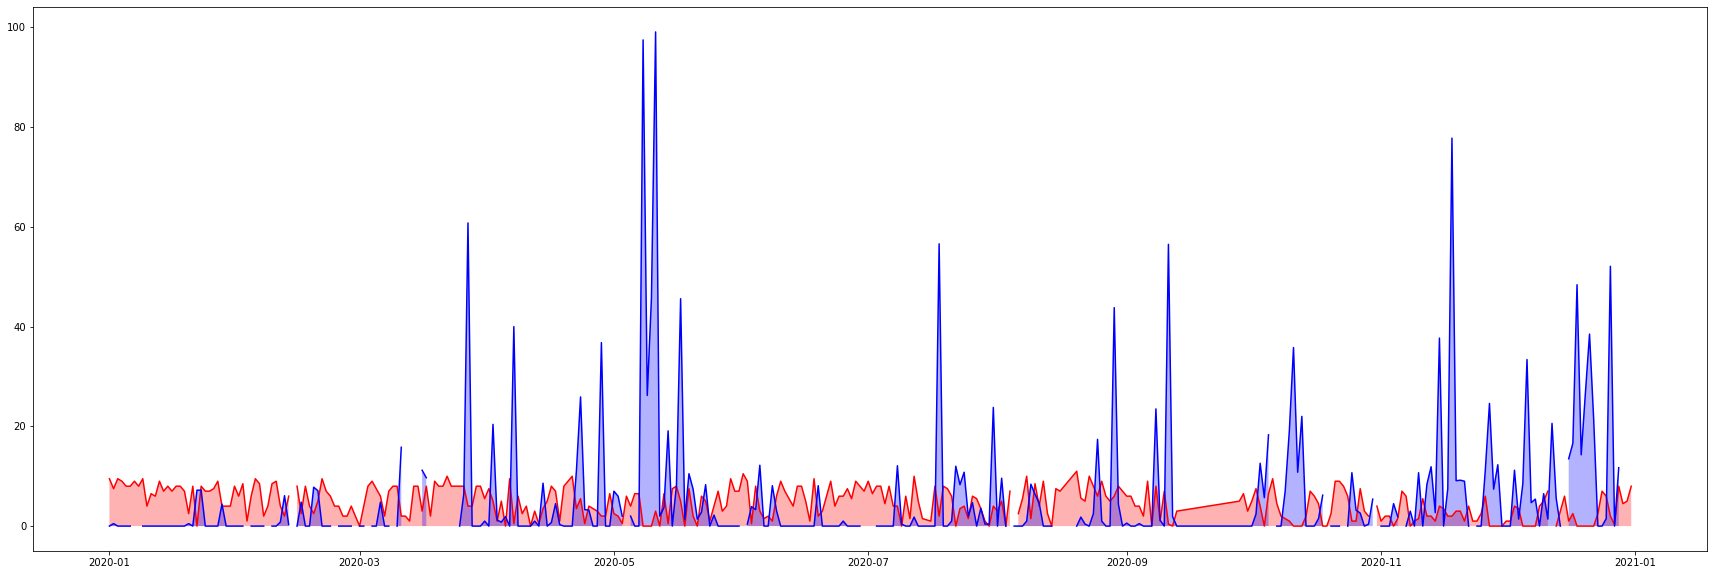

In [49]:
plt.figure(figsize=(30,10))

temp_df = df.copy()
temp_df = temp_df[(temp_df['stationid'] == 96001) & (temp_df['year'] == 2020) & (temp_df['month'] < 13)]

plt.plot(temp_df['fulldate'], temp_df['sunshinedirection'], color='r')
plt.plot(temp_df['fulldate'], temp_df['rainfall'], color='b')

plt.fill_between(temp_df['fulldate'], 0, temp_df['sunshinedirection'], alpha=0.3, facecolor='r')
plt.fill_between(temp_df['fulldate'], 0, temp_df['rainfall'], alpha=0.3, facecolor='b')

plt.show()